In [60]:
import os
import uuid
import numpy as np 
import pandas as pd
#import tensorflow as tf
import matplotlib.pyplot as plt
import seaborn as sns
# This is used in order to show the plotted figures within this notebook
%matplotlib inline 
# This is used in order to show the tensorboard within this notebook             
#%load_ext tensorboard  
from sklearn.preprocessing import OneHotEncoder, LabelEncoder
from sklearn.neighbors import KNeighborsClassifier

from sklearn.metrics import accuracy_score
from sklearn.preprocessing import LabelEncoder, StandardScaler
from collections import Counter

In [61]:
train_df = pd.read_csv('./train.csv/train.csv', index_col=0)
test_df = pd.read_csv('./test.csv/test.csv', index_col=0)
train_preprocessed_df = pd.read_csv('./train.csv/train.csv', index_col=0)
test_preprocessed_df = pd.read_csv('./test.csv/test.csv', index_col=0)

train_df[:100]


,date,org,tld,ccs,bcced,mail_type,images,urls,salutations,designation,chars_in_subject,chars_in_body,label
0,"Mon, 6 Nov 2017 11:13:45 +0100",reply,ebay.in,0,0,multipart/alternative,35,120,0,0,49.0,80027,2
1,"Wed, 14 Feb 2018 11:00:16 -0000",edm,efinmail.com,0,0,multipart/alternative,1,7,0,0,107.0,2961,1
2,"Wed, 6 Jul 2016 19:53:37 +0000",usebackpack,com,0,0,text/html,4,17,0,0,35.0,25149,1
3,"Fri, 11 Oct 2019 11:25:40 +0200",granular,ai,0,0,multipart/mixed,0,0,0,0,15.0,635296,1
4,"Tue, 07 Nov 2017 11:07:18 +0000 (UTC)",github,com,1,0,multipart/alternative,2,11,0,0,49.0,2355,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
95,"Wed, 2 Dec 2015 20:34:02 +0530",iiitd,ac.in,0,0,multipart/mixed,1,0,0,0,0.0,169178,1
96,"Mon, 5 Nov 2018 09:35:10 +0000",centralesupelec,fr,0,0,text/html,4,14,0,0,191.0,8420,1
97,"Wed, 31 May 2017 05:37:18 +0000",innerchef,com,0,0,multipart/alternative,5,33,0,0,70.0,43332,2
98,"Wed, 09 Mar 2016 16:51:20 +0000",youtube,com,0,0,multipart/alternative,14,60,0,0,57.0,55206,1


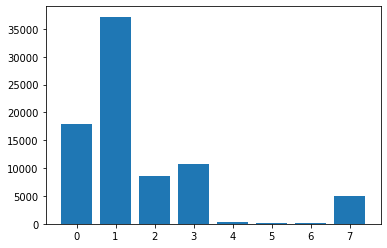

date                0.000000
org                 4.304281
tld                 4.306775
ccs                 0.000000
bcced               0.000000
mail_type           0.214528
images              0.000000
urls                0.000000
salutations         0.000000
designation         0.000000
chars_in_subject    0.019956
chars_in_body       0.000000
label               0.000000
dtype: float64


In [62]:
counter = Counter(train_preprocessed_df['label'])
plt.bar(counter.keys(), counter.values())
plt.show()

percent_missing = train_preprocessed_df.isnull().sum() * 100 / len(train_preprocessed_df)
print(percent_missing)

In [ ]:
#print(train_df['tld'].value_counts().to_string())
tlds = pd.read_csv("https://gist.githubusercontent.com/derlin/421d2bb55018a1538271227ff6b1299d/raw/3a131d47ca322a1d001f1f79333d924672194f36/country-codes-tlds.csv", encoding='utf8')
tlds = tlds[' tld']

In [ ]:
print(train_df['mail_type'].value_counts().to_string())

In [63]:
train_x = train_preprocessed_df[['mail_type']]
train_x = train_x.fillna(value='None')
train_y = train_preprocessed_df[['label']]

test_x = test_preprocessed_df[['mail_type']]
test_x = test_x.fillna(value='None')

In [64]:

feat_enc = OneHotEncoder()
feat_enc.fit(np.vstack([train_x, test_x]))
train_x_featurized = feat_enc.transform(train_x)
test_x_featurized = feat_enc.transform(test_x)

train_preprocessed_df[feat_enc.categories_[0]] = train_x_featurized.toarray()
test_preprocessed_df[feat_enc.categories_[0]] = test_x_featurized.toarray()

train_preprocessed_df.drop(columns="mail_type", inplace=True)
test_preprocessed_df.drop(columns="mail_type", inplace=True)



c:\Python39\lib\site-packages\sklearn\base.py:443: UserWarning: X has feature names, but OneHotEncoder was fitted without feature names
  warnings.warn(
c:\Python39\lib\site-packages\sklearn\base.py:443: UserWarning: X has feature names, but OneHotEncoder was fitted without feature names
  warnings.warn(


In [65]:
train_org_x = train_preprocessed_df[['org']]
train_org_x = train_org_x.fillna(value='None')

test_org_x = test_preprocessed_df[['org']]
test_org_x = test_org_x.fillna(value='None')

In [66]:

feat_enc2 = LabelEncoder()
feat_enc2.fit(np.vstack([train_org_x, test_org_x]))
train_org_x_featurized = feat_enc2.transform(train_org_x)
test_org_x_featurized = feat_enc2.transform(test_org_x)

train_preprocessed_df['org'] = train_org_x_featurized
test_preprocessed_df['org'] = test_org_x_featurized



c:\Python39\lib\site-packages\sklearn\preprocessing\_label.py:98: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
c:\Python39\lib\site-packages\sklearn\preprocessing\_label.py:133: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [67]:
train_preprocessed_df['org']

0         804
1         318
2        1002
3         441
4         422
         ... 
80171     422
80172      27
80173     433
80174     621
80175      27
Name: org, Length: 80176, dtype: int32

In [68]:
train_tld_x = train_preprocessed_df[['tld']]
train_tld_x = train_tld_x.fillna(value='None')

test_tld_x = test_preprocessed_df[['tld']]
test_tld_x = test_tld_x.fillna(value='None')

In [69]:

feat_enc3 = LabelEncoder()
feat_enc3.fit(np.vstack([train_tld_x, test_tld_x]))
train_tld_x_featurized = feat_enc3.transform(train_tld_x)
test_tld_x_featurized = feat_enc3.transform(test_tld_x)

train_preprocessed_df['tld'] = train_tld_x_featurized
test_preprocessed_df['tld'] = test_tld_x_featurized


c:\Python39\lib\site-packages\sklearn\preprocessing\_label.py:98: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
c:\Python39\lib\site-packages\sklearn\preprocessing\_label.py:133: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [70]:
train_preprocessed_df = train_preprocessed_df.fillna(0)
test_preprocessed_df = test_preprocessed_df.fillna(0)

In [ ]:
print(len(train_preprocessed_df.columns.values.tolist()))

In [ ]:
images = train_df['images']
#images.sort_values()
train_df['images'].sort_values()
print(images)
#print(images[len(images)//4])
#print(images[len(images)//2])

In [71]:
from math import ceil
import numpy as np
import seaborn as sns
%matplotlib inline
import matplotlib.pyplot as plt
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier, AdaBoostClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB
from sklearn.model_selection import train_test_split, RandomizedSearchCV, GridSearchCV
from sklearn.metrics import accuracy_score, f1_score, classification_report, confusion_matrix, ConfusionMatrixDisplay, get_scorer_names
from sklearn.model_selection import learning_curve
from imblearn.over_sampling import SMOTE
from imblearn.combine import SMOTETomek
from sklearn.multiclass import OneVsRestClassifier
from imblearn.ensemble import BalancedRandomForestClassifier, BalancedBaggingClassifier
# These columns will be used as the inputs of the models
removed_columns = ['label', 'date']
input_cols = [x for x in train_preprocessed_df.columns.values.tolist() if x not in removed_columns]
print(input_cols)
# The output columns are the genres
output_col = 'label'

# Averages to calculate for precision, recall, and f1-score
averages = [None, "macro", "weighted", "micro", "samples"]

['org', 'tld', 'ccs', 'bcced', 'images', 'urls', 'salutations', 'designation', 'chars_in_subject', 'chars_in_body', 'Multipart/Alternative', 'Multipart/Mixed', 'None', 'Text/Html', 'multipart/IDM', 'multipart/alternative', 'multipart/mixed', 'multipart/related', 'multipart/report', 'multipart/signed', 'text/HTML', 'text/calendar', 'text/html', 'text/html ', 'text/plain']


In [72]:
def evaluate_model(model, testing_inputs, testing_classes, output_cols, sample_weight=None):
    """
    This helper function prints the report and evaluation metrics for the model.
    """
    predictions = model.predict(testing_inputs)

    print("="*70)
    print(f"Evaluation metrics for {model.__class__.__name__}")
    print("="*70)

    score = model.score(testing_inputs, testing_classes) 
    print(f"{model.__class__.__name__}'s default score metric: {score}")


    print("Classification report")
    print(
        classification_report(testing_classes, predictions, sample_weight=sample_weight, digits=4, zero_division=1)
    )

    accuracy = accuracy_score(testing_classes, predictions, sample_weight=sample_weight)
    print(f"Accuracy: {accuracy:.4f}")

    f1 = f1_score(testing_classes, predictions, sample_weight=sample_weight, average='weighted')
    print(f"F1-Score: {f1:.4f}")

    cm = confusion_matrix(testing_classes, predictions, sample_weight=sample_weight)
    disp = ConfusionMatrixDisplay(cm)
    disp.plot()
    plt.show()
    print("="*70)


In [73]:

def train_and_evaluate(input_cols, output_cols, model, params, n_iter=None, sample_weight=None, random_state=42, scoring='accuracy', tuning=True):
    """
    This function trains the model and prints the evaluation metrics, as well as the confusion matrices, and learning and scalability plots.
    """
    inputs = train_preprocessed_df[input_cols].values
    classes = train_preprocessed_df[output_cols].values
    
    """scaler = StandardScaler()
    X_train = scaler.fit_transform(train_preprocessed_df[input_cols])
    X_test = scaler.fit_transform(test_preprocessed_df[output_cols])
    oversample = SMOTETomek(random_state=random_state)
    inputs, classes = oversample.fit_resample(inputs, classes)
    counter = Counter(classes)
    plt.bar(counter.keys(), counter.values())
    plt.show()"""
    

    
    (training_inputs, testing_inputs, training_classes, testing_classes) = train_test_split(inputs, classes, test_size=0.2, random_state=random_state)
    if tuning:
        if n_iter == None:
            clf = GridSearchCV(model, params, n_jobs=-1, cv=5)
        else:
            clf = RandomizedSearchCV(
                model, params, n_iter=n_iter, scoring=scoring,
                n_jobs=-1, cv=5, random_state=random_state)
    else:
        clf = model
    
    clf.fit(training_inputs, training_classes)

    if tuning:
        print(f"Best params for {model.__class__.__name__}: {clf.best_params_}")
        
    evaluate_model(clf, testing_inputs, testing_classes, output_cols, sample_weight=sample_weight)
    
    return clf

In [74]:
def use_model(model, params = {}, scoring='accuracy', n_iter=50, random_state=42, tuning=True):
    """
    A more convenient wrapper around train_and_evaluate, albeit less general.
    """
    return train_and_evaluate(input_cols, output_col, model, params, n_iter=n_iter, random_state=random_state, scoring=scoring, tuning=tuning)

In [ ]:
train_preprocessed_df[input_cols].head()

In [ ]:
use_model(
    DecisionTreeClassifier(class_weight={0:10, 1:20, 2:5, 3:6, 4:2, 5:2, 6:2, 7:4}), 
    {
        "criterion": ['gini', 'entropy'],
        'splitter': ['best', 'random'],
        "max_depth": range(1,50),
        'max_features': range(1, len(input_cols)),
        "min_samples_split": range(2,15),
        "min_samples_leaf": range(1,7)
    },
    n_iter=200,
)


In [ ]:
use_model(
    AdaBoostClassifier(),
    {
        'n_estimators': [10,50,100,500],
        'learning_rate':[0.0001, 0.001, 0.01, 0.1, 1.0]
    },
    n_iter=5
)

In [ ]:
use_model(
    KNeighborsClassifier(), 
    {
        "n_neighbors": list(range(1,31)),
        "weights": ['uniform', 'distance'],
    },
    n_iter=5
)

In [ ]:
clf = use_model(
    RandomForestClassifier(class_weight={0:20, 1:20, 2:5, 3:6, 4:2, 5:2, 6:2, 7:4}), 
    { 
        'n_estimators': range(5, 30),
        'max_features': range(1, 8),
        "max_depth": range(1,15),
        'criterion' :['gini', 'entropy']
    },
    n_iter=100
)

Best params for BalancedRandomForestClassifier: {'n_estimators': 28, 'max_features': 7, 'max_depth': 14, 'criterion': 'entropy'}
Evaluation metrics for RandomizedSearchCV
RandomizedSearchCV's default score metric: 0.4401346969319032
Classification report
              precision    recall  f1-score   support

           0     0.5118    0.5693    0.5390      3680
           1     0.7200    0.1436    0.2395      7429
           2     0.4171    0.5881    0.4881      1719
           3     0.4914    0.8943    0.6343      2109
           4     0.0617    0.9200    0.1156        50
           5     0.0424    0.9615    0.0812        26
           6     0.0380    0.9032    0.0729        31
           7     0.4233    0.9073    0.5773       992

    accuracy                         0.4401     16036
   macro avg     0.3382    0.7359    0.3435     16036
weighted avg     0.5869    0.4401    0.4067     16036

Accuracy: 0.4401
F1-Score: 0.4067


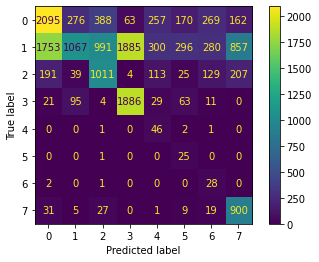

In [76]:
clf = use_model(
    BalancedRandomForestClassifier(), 
    { 
        'n_estimators': range(5, 30),
        'max_features': range(1, 8),
        "max_depth": range(1,15),
        'criterion' :['gini', 'entropy']
    },
    n_iter=100
)

In [ ]:
clf = use_model(
    BalancedBaggingClassifier(), 
    { 
        'n_estimators': range(5, 30),
        'max_features': range(1, 8),
        "max_depth": range(1,15),
        'criterion' :['gini', 'entropy']
    },
    n_iter=100
)

In [ ]:
use_model(
    LogisticRegression(multi_class='multinomial'), 
    {
        "solver": ['newton-cg', 'lbfgs', 'sag', 'saga'],
        "penalty": ['l2'],
        "C": [100, 10, 1.0, 0.1, 0.01],
    },
    n_iter=1,
)

In [ ]:
use_model(
    OneVsRestClassifier(RandomForestClassifier()),
    tuning=False,
)